# Train another AI model

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pickle as pkl

### Load and preprocess the data

In [24]:
# load the data
data = pd.read_csv('../data/clean_data.csv')
# load the encoders
le_color = pkl.load(open('../models/LabEnc_color.pkl', 'rb'))
le_class = pkl.load(open('../models/LabEnc_class.pkl', 'rb'))
# encode the target variable
data['Spectral Class'] = le_class.transform(data['Spectral Class'])
data['Star color'] = le_color.transform(data['Star color'])
# normalize the data except the target variable
scaler = StandardScaler()
data.iloc[:, :-1] = scaler.fit_transform(data.iloc[:, :-1])
# split the data into train and test
X = data.drop(['Spectral Class'], axis=1)
y = data['Spectral Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Create a Decision Tree Model

Accuracy: 0.8125


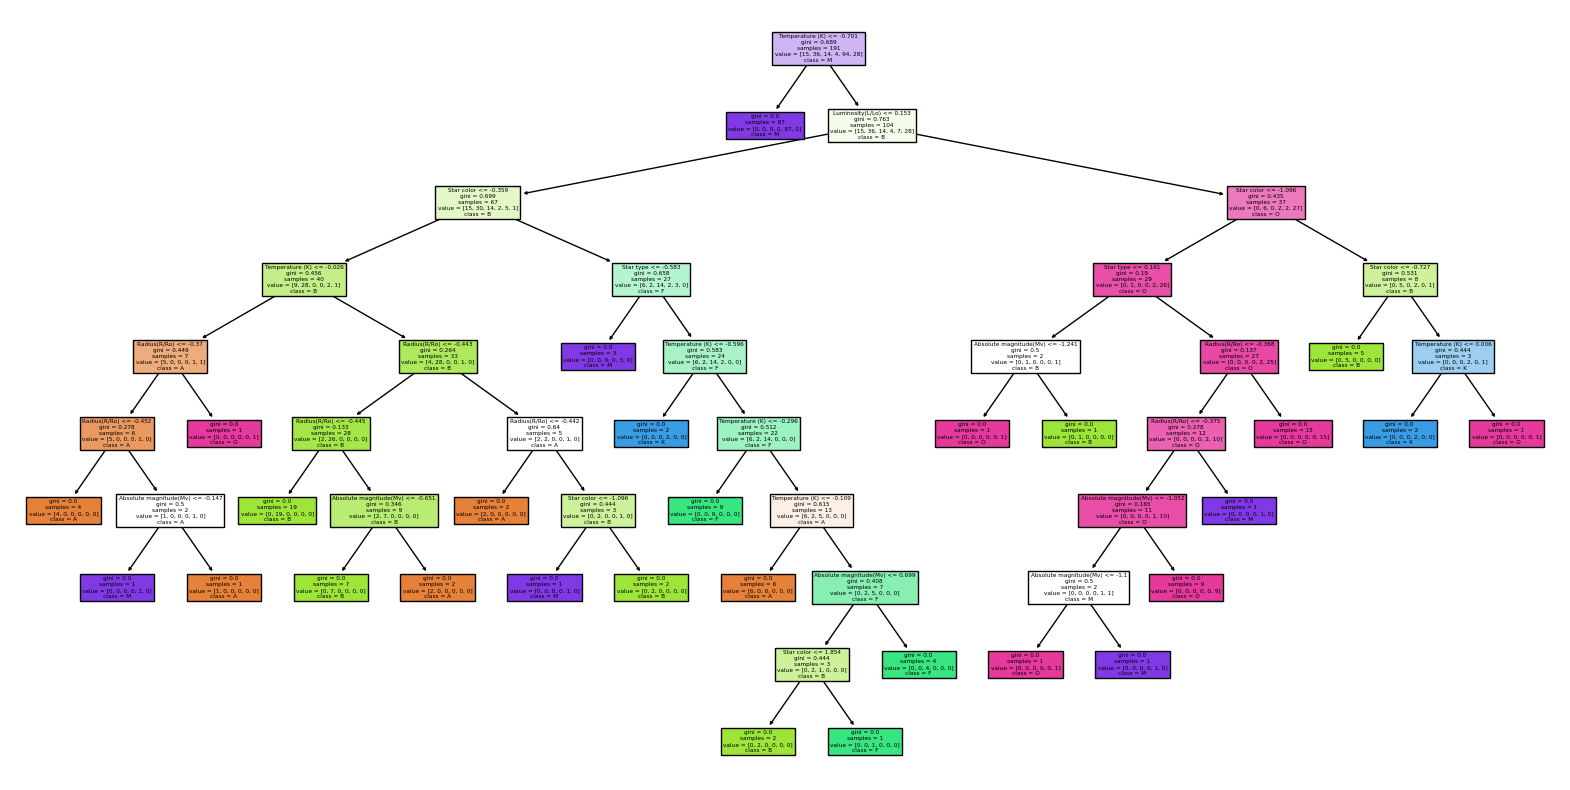

In [25]:
# create a classifier tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

# visualize the tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=data.columns[:-1].to_list(), class_names=le_class.classes_.tolist())
plt.savefig('../plots/tree_high_dpi', dpi=300)

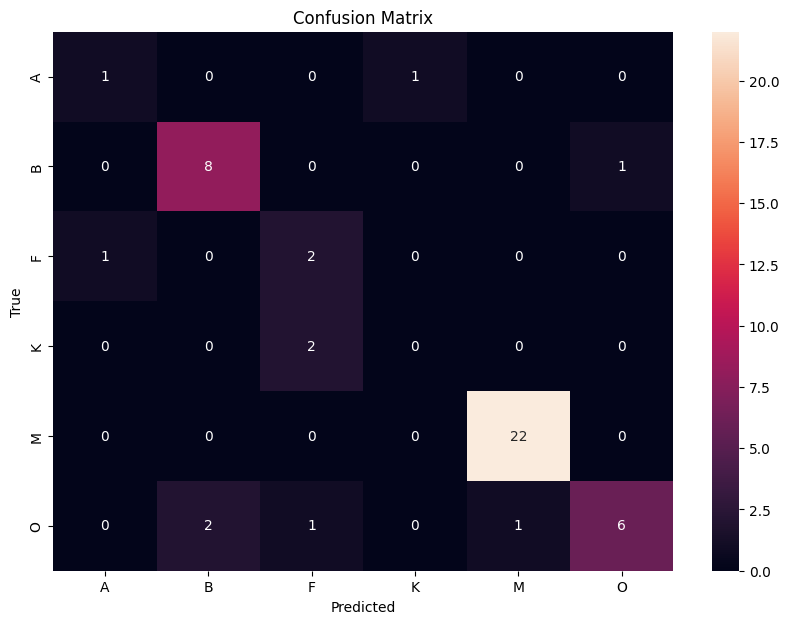

In [26]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le_class.classes_, yticklabels=le_class.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig('../plots/confusion_matrix_DT', dpi=100)

### Save the Decision Tree Model

In [27]:
# save the model
import joblib
joblib.dump(clf, '../models/DecisionTree_model.pkl')

['../models/DecisionTree_model.pkl']

### Train a Neural Network Model

In [28]:
# create a neural network
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(62, 62, 62), activation='relu', max_iter=1000, verbose = 1)

In [29]:
# train the model
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

Iteration 1, loss = 1.79589937
Iteration 2, loss = 1.74806556
Iteration 3, loss = 1.70309553
Iteration 4, loss = 1.66063524
Iteration 5, loss = 1.62051190
Iteration 6, loss = 1.58252999
Iteration 7, loss = 1.54620890
Iteration 8, loss = 1.51126541
Iteration 9, loss = 1.47746806
Iteration 10, loss = 1.44480125
Iteration 11, loss = 1.41288732
Iteration 12, loss = 1.38185918
Iteration 13, loss = 1.35154871
Iteration 14, loss = 1.32184802
Iteration 15, loss = 1.29301653
Iteration 16, loss = 1.26526501
Iteration 17, loss = 1.23804771
Iteration 18, loss = 1.21131991


Iteration 19, loss = 1.18521109
Iteration 20, loss = 1.15961362
Iteration 21, loss = 1.13452777
Iteration 22, loss = 1.11010676
Iteration 23, loss = 1.08629521
Iteration 24, loss = 1.06317420
Iteration 25, loss = 1.04068795
Iteration 26, loss = 1.01886173
Iteration 27, loss = 0.99755008
Iteration 28, loss = 0.97691933
Iteration 29, loss = 0.95709038
Iteration 30, loss = 0.93814413
Iteration 31, loss = 0.91989539
Iteration 32, loss = 0.90231614
Iteration 33, loss = 0.88535686
Iteration 34, loss = 0.86903517
Iteration 35, loss = 0.85321869
Iteration 36, loss = 0.83798765
Iteration 37, loss = 0.82318028
Iteration 38, loss = 0.80888102
Iteration 39, loss = 0.79493004
Iteration 40, loss = 0.78142042
Iteration 41, loss = 0.76824733
Iteration 42, loss = 0.75541453
Iteration 43, loss = 0.74289881
Iteration 44, loss = 0.73064492
Iteration 45, loss = 0.71866676
Iteration 46, loss = 0.70690779
Iteration 47, loss = 0.69539274
Iteration 48, loss = 0.68416671
Iteration 49, loss = 0.67331270
Iteratio

In [30]:
# save the trained model 
import joblib
joblib.dump(clf, '../models/NeuralNetwork_model.pkl')

['../models/NeuralNetwork_model.pkl']

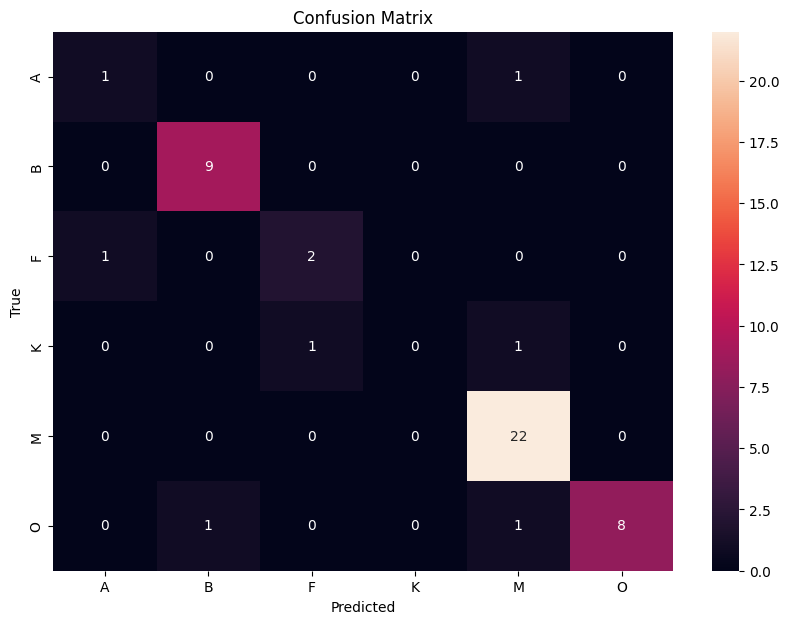

In [31]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le_class.classes_, yticklabels=le_class.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig('../plots/confusion_matrix_NN', dpi=100)